# ps1-1: linear classifiers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import src.util as util

from src.linear_model import LinearModel

## (b) Logistic Regression

In [2]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        
        def h(theta, x):
            """
            calculate h based on theta and xi
            
            theta:  parameter. shape (n,)
            x:      all traning example inputs. shape (m, n)
            return: hypotheses for all traning example. shape (m,)
            """
            return 1 / (1 + np.exp(- np.dot(x, theta)))
        
        def gradient(theta, x, y):
            """
            calculate the gradient vector of J wrt to theta
            
            theta:  shape(n,)
            x:      all training example inputs. shape (m, n)
            y:      all training example labels. shape (m,)
            return: gradient of J. shape (n,)
            """
            m, n = x.shape
            y = np.reshape(y, (m, 1))
            return - 1 / m * np.dot(x.T, y - h(theta, x))
        
        def hessian(theta, x):
            """
            calculate the hessian matrix of J wrt to theta
            
            theta:  shape(n,)
            x:      all training example inputs. shape (m, n)
            return: hessian matrix of J. shape (n,n)
            """
            m, n = x.shape
            h_theta_x = np.reshape(h(theta, x), (-1, 1))
            return 1 / m * np.dot(x.T, h_theta_x * (1-h_theta_x) * x)
        
        def next_theta(theta, x, y):
            return theta - np.dot(np.linalg.inv(hessian(theta, x)), gradient(theta, x, y))
        
        m, n = x.shape
        self.theta = np.zeros((n, 1))
        
        old_theta = self.theta
        new_theta = next_theta(self.theta, x, y)
        while np.linalg.norm(abs(old_theta - new_theta)) >= self.eps:
            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)
        self.theta = new_theta
        print(f'Fitting result: theta is {self.theta}')

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return (1 / (1 + np.exp(- np.dot(x, self.theta))) >= 0.5).astype(int)
        # *** END CODE HERE ***

first dataset

In [3]:
train_path='data/ds1_train.csv'
eval_path='data/ds1_valid.csv'
pred_path='src/output/p01b_pred_1.txt'

In [4]:
"""
Problem 1(b): Logistic regression with Newton's Method.

Args:
    train_path: Path to CSV file containing dataset for training.
    eval_path: Path to CSV file containing dataset for evaluation.
    pred_path: Path to save predictions.
"""
x_train, y_train = util.load_dataset(train_path, add_intercept=True)

# *** START CODE HERE ***
clf = LogisticRegression()
clf.fit(x_train, y_train)

# *** END CODE HERE ***

Fitting result: theta is [[-6.26018491]
 [ 2.47707251]
 [-0.0299125 ]]


The accuracy on validation set is:  0.8825


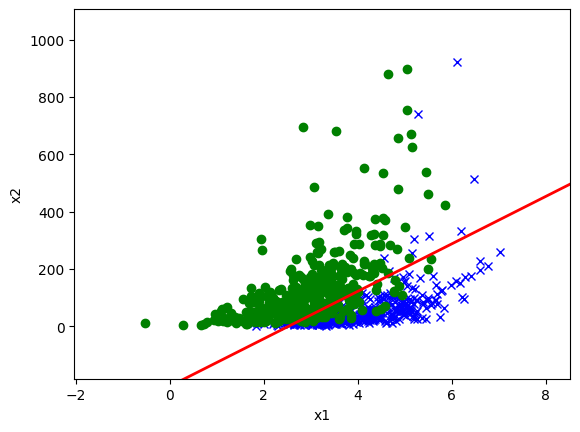

In [5]:
util.plot(x_train, y_train, clf.theta)
temp = np.reshape(clf.predict(x_train), (1,-1))
print("The accuracy on validation set is: ", np.mean(temp == y_train))

In [6]:
x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
y_pred = clf.predict(x_eval)
np.savetxt(pred_path, y_pred > 0.5, fmt='%.1f')

The accuracy on validation set is:  0.9


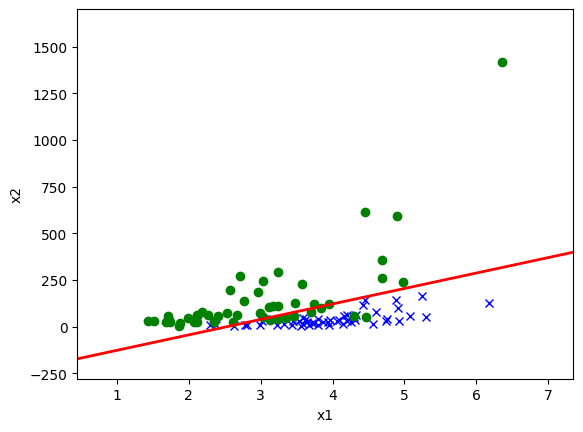

In [7]:
util.plot(x_eval, y_eval, clf.theta)
print("The accuracy on validation set is: ", np.mean(np.reshape(y_pred,(1,-1)) == y_eval))

second dataset

In [8]:
train_path='data/ds2_train.csv'
eval_path='data/ds2_valid.csv'
pred_path='src/output/p01b_pred_2.txt'

In [9]:
"""
Problem 1(b): Logistic regression with Newton's Method.

Args:
    train_path: Path to CSV file containing dataset for training.
    eval_path: Path to CSV file containing dataset for evaluation.
    pred_path: Path to save predictions.
"""
x_train, y_train = util.load_dataset(train_path, add_intercept=True)

# *** START CODE HERE ***
clf = LogisticRegression()
clf.fit(x_train, y_train)

# *** END CODE HERE ***

Fitting result: theta is [[ 2.38425454]
 [ 3.6371206 ]
 [-3.81234337]]


The accuracy on validation set is:  0.915


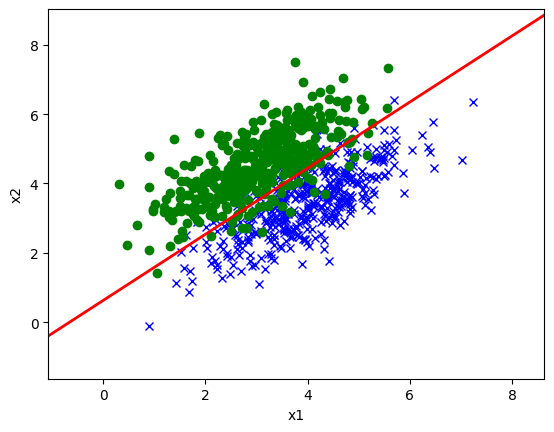

In [10]:
util.plot(x_train, y_train, clf.theta)
temp = np.reshape(clf.predict(x_train), (1,-1))
print("The accuracy on validation set is: ", np.mean(temp == y_train))

The accuracy on validation set is:  0.91


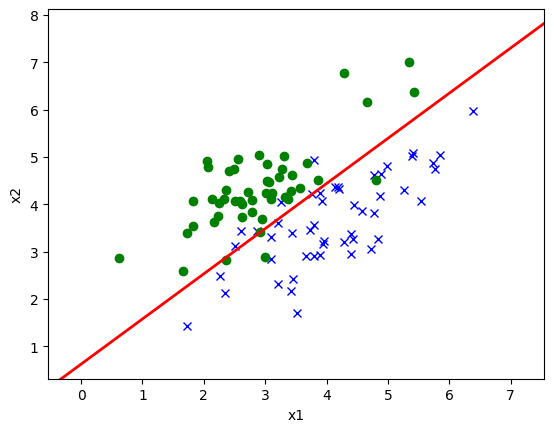

In [11]:
x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
y_pred = clf.predict(x_eval)
util.plot(x_eval, y_eval, clf.theta)
print("The accuracy on validation set is: ", np.mean(np.reshape(y_pred,(1,-1)) == y_eval))

## (e) GDA

In [12]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters. Shape (n+1, 1)
        """
        # *** START CODE HERE ***
        m,n = x.shape
        np.reshape(y, (m, 1))
        self.phi = np.sum(y == 1) / m
        self.mu0 = (np.dot(x.T, y == 0)) / (np.sum(y == 0))
        self.mu1 = (np.dot(x.T, y == 1)) / (np.sum(y == 1))
        self.sigma = np.dot((x - self.mu1).T * (y == 1), (x - self.mu1)) + np.dot((x - self.mu0).T * (y == 1), (x - self.mu0))
        self.sigma = self.sigma / m
        
        self.theta = np.zeros((n+1, 1))
        theta = np.dot(np.linalg.inv(self.sigma), self.mu1 - self.mu0)
        theta0 = 0.5 * np.dot(self.mu0.T, np.dot(np.linalg.inv(self.sigma), self.mu0)) 
        theta0 -= 0.5 * np.dot(self.mu1.T, np.dot(np.linalg.inv(self.sigma), self.mu1)) 
        theta0 += np.log((1-self.phi)/self.phi)
        self.theta[0] = theta0
        self.theta[1:] = np.reshape(theta, (-1,1))
        self.theta0 = theta0
        self.theta1 = theta
        print(f'Fitting result: theta is {self.theta}')
        return self.theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return (1 / (1 + np.exp(-(np.dot(x, self.theta1) + self.theta0)))) >= 0.5
        # *** END CODE HERE


first dataset

In [13]:
train_path='data/ds1_train.csv'
eval_path='data/ds1_valid.csv'
pred_path='src/output/p01e_pred_1.txt'

In [14]:
"""Problem 1(e): Gaussian discriminant analysis (GDA)

Args:
    train_path: Path to CSV file containing dataset for training.
    eval_path: Path to CSV file containing dataset for evaluation.
    pred_path: Path to save predictions.
"""
# Load dataset
x_train, y_train = util.load_dataset(train_path, add_intercept=False)

# *** START CODE HERE ***
clf = GDA()
theta = clf.fit(x_train, y_train)
# *** END CODE HERE ***

Fitting result: theta is [[-1.72594481]
 [ 0.71486716]
 [-0.00848968]]


The accuracy on validation set is:  0.87375


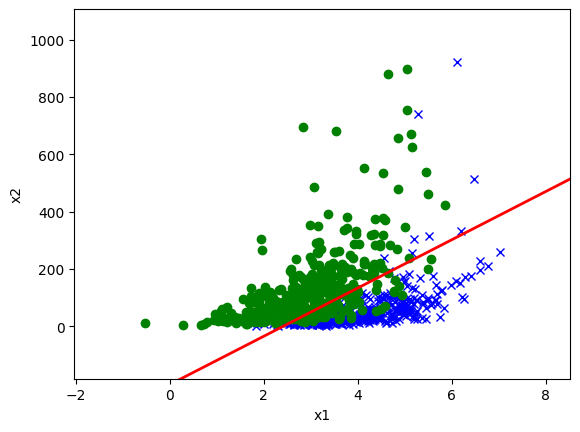

In [15]:
util.plot(x_train, y_train, theta)
temp = np.reshape(clf.predict(x_train), (1,-1))
print("The accuracy on validation set is: ", np.mean(temp == y_train))

The accuracy on validation set is:  0.88


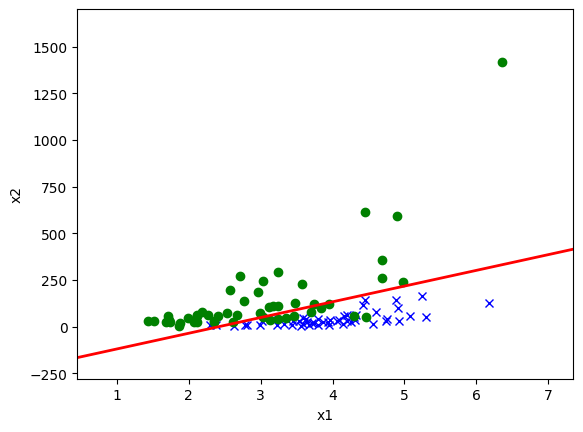

In [16]:
x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)
y_pred = clf.predict(x_eval)
util.plot(x_eval, y_eval, clf.theta)
print("The accuracy on validation set is: ", np.mean(np.reshape(y_pred,(1,-1)) == y_eval))

second dataset

In [17]:
train_path='data/ds2_train.csv'
eval_path='data/ds2_valid.csv'
pred_path='src/output/p01b_pred_2.txt'

In [18]:
"""Problem 1(e): Gaussian discriminant analysis (GDA)

Args:
    train_path: Path to CSV file containing dataset for training.
    eval_path: Path to CSV file containing dataset for evaluation.
    pred_path: Path to save predictions.
"""
# Load dataset
x_train, y_train = util.load_dataset(train_path, add_intercept=False)

# *** START CODE HERE ***
clf = GDA()
theta = clf.fit(x_train, y_train)
# *** END CODE HERE ***

Fitting result: theta is [[ 0.55710527]
 [ 0.77309824]
 [-0.82011833]]


The accuracy on validation set is:  0.915


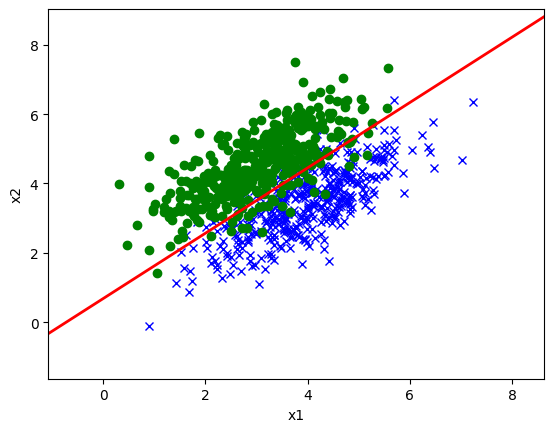

In [19]:
util.plot(x_train, y_train, theta)
temp = np.reshape(clf.predict(x_train), (1,-1))
print("The accuracy on validation set is: ", np.mean(temp == y_train))

The accuracy on validation set is:  0.91


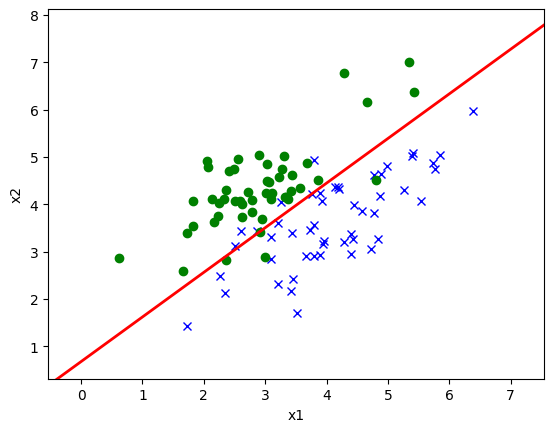

In [20]:
x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)
y_pred = clf.predict(x_eval)
util.plot(x_eval, y_eval, clf.theta)
print("The accuracy on validation set is: ", np.mean(np.reshape(y_pred,(1,-1)) == y_eval))